## This scripts takes bags of words previously generated (using steps 2 to 4) to perform frequency analysis, generate a ClimateVSConflict ratio and plot the time series

In [ ]:
##Bags of The Words generated using the scripts Step2-4_geenrate_bags_of_words

climate = ['acclimatisation', 'adaptation', 'air', 'water',  
           'airflow', 'desiccant', 'evaporation','atmosphere','gases', 'oceans', 'ice', 'sunlight', 'snow','autumn',
           'cold', 'dehumidify','moist', 'pre-heat', 'humidify', 'condense', 'dehumidifying', 'floods', 'storms', 'cyclones', 'dry', 'wet', 
           'winter', 'summer', 'hot', 'rain', 'rainy', 'ecology', 
            'biodiversity', 'biological','ecosystems','climate', 'nature', 
            'ecological', 'environments', 'environs','firestorm', 'flooding', 
           'coastal', 'deforestation', 'desertification', 'hailstorm', 'heat',
           'cooling','monsoon', 'droughts', 'heatwaves','seasons', 'hurricanes', 'summers', 'natural', 
           'geological','weather-related','climate-related',
           'precipitation','Arctic', 'melting', 'summertime', 'downpours',
           'sunny', 'cloudy', 'temperature', 'humidity', 'pressure','thaw','Superheated', 'thawing', 'permafrost', 
           'typhoon', 'evapotranspiration','warming', 'warmth','weather', 'climatic', 'rainfall', 'wind', 'sun', 'spring']

conflict = ['arguing', 'argue', 'argues','assault', 'Diseases', 'battle','blow','cruel'  'burn','disdain','clash', 'divergence', 'collide', 
            'non-forest', 'combat', 'tackle', 'mitigate','confront','losses', 'inequality', 'instability', 'displacement,', 'conflicts',
            'vulnerability', 'contender', 'force', 'controversy','unavailing', 'criticism','repress', 'slavery', 'strive','complex', 'danger',
            'victims', 'uncertainty', 'extinction', 'possibility', 'devastate', 'aggravate', 'spark', 'disrupt', 'worsen', 'tarnish', 'labor', 
            'labour','affect', 'disenfranchise', 'outpouring', 'overflow','contaminate', 'irregular', 'oversupply',  'thwart', 'pestilence',
            'plague', 'extremes','dispute','endangerment', 'Effects','aggravation','Termination','feud','condemnation','fight', 'combat',
            'fighting','at-risk','offshoot','eliminate','hazard', 'disasters:', 'sudden', 'sudden-onset','disease', 'insurrection',
            'undernutrition','avoiding', 'jeopardy', 'delinked', 'flooding', 'violence', 'undernutrition', 'languish','disequilibrium', 
            'declines', 'hardships','aggravate','hunger','disagrees','unfair', 'peril','shortages', 'failure','insecurity', 'non-cultivated',
            'struggle', 'migrate', 'scarcity', 'discrediting','relocate', 'unpredictability','protest', 'desert' ]

In [ ]:
## Here we collect the relevant data to generate a dataset with word frequencies
## For each text in the corpus, we collect author, year, title, and the tokenized text

import os
from os import path

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## this is a list which will store the relevant data to the dataframe
data_to_df =[]

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:

        ## list where we will store the relevant data for this text 
        text_data = []

        ## list in which we will stored tokenized text
        tokenized_text = []
        
        if '.txt' in file[-4:] and 'model' not in file:
            print(file)

            ## we can obtain author, year, title from filename
            author = file.split('-')[0]
            year = int(file.split('-')[1])
            title = file.split('-')[2]
            
            ## we get the full path and open the file
            name = os.path.join(path, file)
            file_text = open(name, encoding = 'utf-8',errors='ignore').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                tokenized_text += paragraph.split(' ')

            ## store relevant info into a variable
            text_data = [author,year,title,tokenized_text]

            ## store the relevant data of each text into a general list of lists
            data_to_df += [text_data]

/content
aaditya-2012-Climate responsive.txt
Yang etal-2013-ecobuilding.txt
wangetal-2019-Study.txt
yali-2014-Simulation.txt
Tham etal-2009-clear sky radiation data.txt
zhangetal-2020-Capacity.txt
chien-2014-Assessment.txt
fritschi etal-2016-Efficiency.txt
Varga etal-2009-cooling system.txt
law etal-2013-heat pump and an organic Rankine.txt
shao etal-2015-Wireless Energy.txt
chen etal-2012-Internal.txt
Zurigat-2007-Typical.txt
dayma etal-2013-Energetic and exergetic analyses of a transcritical N2O heat pump system.txt
lian etal-2016-Simultaneous synthes.txt
gong etal-2012-Emissions.txt
aleknaviciute-2012-Plasma assis.txt
meng etal-2010-Multiobjective analyses.txt
zhangetal-2012-Gascleaning.txt
maheshwari-2009-Performance.txt
esfahankalteh-2020-Achieving.txt
Lingen-2013-cycle.txt
chen and li-2020-A state of art meth.txt
Barros etal-2013-land use.txt
rao-2013-Analysis.txt
kong-2020-Optimal.txt
arslan-2013-Characterization.txt
Oleivera-2007-towards a renewable future.txt
shang-2020-Rurale

In [ ]:
len(data_to_df)

607

In [ ]:
## Here we create the dataset using the list of lists created above
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data_to_df, columns = ['author', 'year','title','tokenized_text'])
  
# print dataframe.
df

,author,year,title,tokenized_text
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi..."
1,Yang etal,2013,ecobuilding.txt,"[The, design, and, performance, monitoring, of..."
2,wangetal,2019,Study.txt,"[Study, on, seawater, intrusion, in, Laizhou, ..."
3,yali,2014,Simulation.txt,"[Simulation, of, dynamic, characteristics, of,..."
4,Tham etal,2009,clear sky radiation data.txt,"[A, generalized, procedure, to, generate, clea..."
...,...,...,...,...
602,suetal,2018,Nanosilicon.txt,"[Nanosilicon, dioxide, hydrosol, as, surfactan..."
603,wangetal,2012,Superhydrophobic.txt,"[Superhydrophobic, flow, channel, surface, and..."
604,Vasiliev etal,2008,activated carbon.txt,"[Activated, carbon, fiber, composites, for, am..."
605,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col..."


In [ ]:
## Create a function to calculate word counts of a particular bag of words

from collections import Counter

def count_BOW(bag_of_words,tokenized_text):
  count_occurences_of_each_word = Counter(tokenized_text)
  #print(count_occurences_of_each_word)

  total_bag_count = 0
  for word in bag_of_words:
    #print(word, count_occurences_of_each_word[word])

    total_bag_count += count_occurences_of_each_word[word]
  return(total_bag_count)



In [ ]:
count_BOW(['climate','conflict','i'],df['tokenized_text'][0])

15

In [ ]:
## count all the words in each text pertaining to the bag of words climate and conflict

list_climate_counts=[]
list_conflict_counts=[]

for text in df['tokenized_text']:
  climate_count = count_BOW(climate, text)
  list_climate_counts+=[climate_count]

  conflict_count = count_BOW(conflict, text)
  list_conflict_counts+=[conflict_count]

In [ ]:
## Add the counts of bags of words to the dataFrame

df['climate'] = list_climate_counts
df['conflict'] = list_conflict_counts

df

,author,year,title,tokenized_text,climate,conflict
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi...",152,6
1,Yang etal,2013,ecobuilding.txt,"[The, design, and, performance, monitoring, of...",42,2
2,wangetal,2019,Study.txt,"[Study, on, seawater, intrusion, in, Laizhou, ...",43,10
3,yali,2014,Simulation.txt,"[Simulation, of, dynamic, characteristics, of,...",18,6
4,Tham etal,2009,clear sky radiation data.txt,"[A, generalized, procedure, to, generate, clea...",46,1
...,...,...,...,...,...,...
602,suetal,2018,Nanosilicon.txt,"[Nanosilicon, dioxide, hydrosol, as, surfactan...",30,4
603,wangetal,2012,Superhydrophobic.txt,"[Superhydrophobic, flow, channel, surface, and...",143,9
604,Vasiliev etal,2008,activated carbon.txt,"[Activated, carbon, fiber, composites, for, am...",113,10
605,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col...",10,4


In [ ]:
## Calculate a climate to conflict ratio

df['climate-conflict-ratio'] = (df['climate'] - df['conflict'])/(df['climate'] + df['conflict'])

df

,author,year,title,tokenized_text,climate,conflict,climate-conflict-ratio
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi...",152,6,0.924051
1,Yang etal,2013,ecobuilding.txt,"[The, design, and, performance, monitoring, of...",42,2,0.909091
2,wangetal,2019,Study.txt,"[Study, on, seawater, intrusion, in, Laizhou, ...",43,10,0.622642
3,yali,2014,Simulation.txt,"[Simulation, of, dynamic, characteristics, of,...",18,6,0.500000
4,Tham etal,2009,clear sky radiation data.txt,"[A, generalized, procedure, to, generate, clea...",46,1,0.957447
...,...,...,...,...,...,...,...
602,suetal,2018,Nanosilicon.txt,"[Nanosilicon, dioxide, hydrosol, as, surfactan...",30,4,0.764706
603,wangetal,2012,Superhydrophobic.txt,"[Superhydrophobic, flow, channel, surface, and...",143,9,0.881579
604,Vasiliev etal,2008,activated carbon.txt,"[Activated, carbon, fiber, composites, for, am...",113,10,0.837398
605,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col...",10,4,0.428571


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


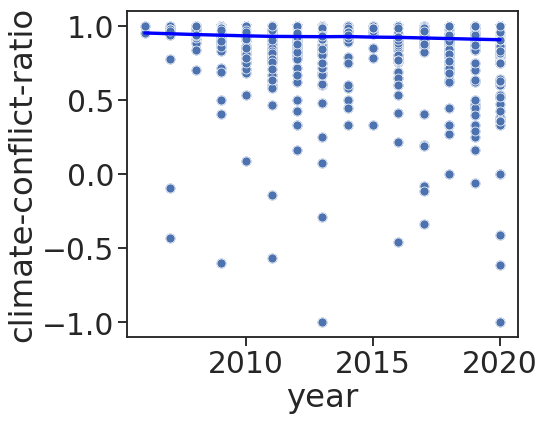

In [ ]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df, lowess=True, line_kws={"color": "blue"}, x="year", y="climate-conflict-ratio")
sns.scatterplot(data=df, x="year", y="climate-conflict-ratio", ci=None)



In [ ]:
new_df = df.drop(['tokenized_text', 'climate','conflict'], axis=1)
new_df.to_csv('climate_conflict.csv')